In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [39]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(x)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()

x_lda=lda.fit_transform(df_scaled,y)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test=train_test_split(x_lda,y,test_size=0.2,random_state=100)
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

sample=[[0.1,0.5,0.4,0.2]]
sample_scaled=scaler.transform(sample)
sample_lda =lda.transform(sample_scaled)

ypred=classifier.predict(sample_lda)
print(ypred)

['Iris-versicolor']


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
import pandas as pd

In [89]:
df=pd.read_csv("diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [96]:
for column in df.columns:
     print(f"Column: {column}")
     print(f"Frequency:\n{df[column].value_counts()}\n")
     print(f"Mean: {df[column].mean()}")
     print(f"Median: {df[column].median()}")
     print(f"Mode:\n{df[column].mode()}")
     print(f"Variance: {df[column].var()}")
     print(f"Standard Deviation:{df[column].std()}")
     print(f"Skewness:{df[column].skew()}")
     print(f"Kurtosis: {df[column].kurt()}")
     print(" \n")

Column: Pregnancies
Frequency:
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

Mean: 3.8450520833333335
Median: 3.0
Mode:
0    1
Name: Pregnancies, dtype: int64
Variance: 11.35405632062142
Standard Deviation:3.3695780626988623
Skewness:0.9016739791518588
Kurtosis: 0.15921977754746486
 

Column: Glucose
Frequency:
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

Mean: 120.89453125
Median: 117.0
Mode:
0     99
1    100
Name: Glucose, dtype: int64
Variance: 1022.2483142519557
Standard Deviation:31.97261819513622
Skewness:0.17375350179188992
Kurtosis: 0.6407798203735053
 

Column: BloodPressure
Frequency:
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     

In [105]:
from sklearn.linear_model import LinearRegression,LogisticRegression

x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

model_linear = LinearRegression()
model_linear.fit(x, y)

print('Linear Regression Coefficients:')
for feature, coef in zip(x.columns, model_linear.coef_):
 print(f'{feature}: {coef}')

Linear Regression Coefficients:
Pregnancies: 0.020591871520332324
Glucose: 0.00592027294765986
BloodPressure: -0.0023318790024439936
SkinThickness: 0.00015451979194521076
Insulin: -0.0001805345135679695
BMI: 0.013244031483241887
DiabetesPedigreeFunction: 0.14723743863275177
Age: 0.002621393798269234


In [114]:

x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

model_log = LogisticRegression()
model_log.fit(x, y)

print('Logistic Regression Coefficients:')
for feature, coef in zip(x.columns, model_log.coef_[0]):
  print(f'{feature}: {coef}')

Logistic Regression Coefficients:
Pregnancies: 0.11725233506126166
Glucose: 0.033599830496310934
BloodPressure: -0.014087379609219606
SkinThickness: -0.0012704826340619296
Insulin: -0.0012403208351067481
BMI: 0.07720235202069489
DiabetesPedigreeFunction: 1.4190416760403026
Age: 0.010035374240374522


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [123]:
X = df.drop('Outcome', axis=1) # Independent variables
y = df['Outcome']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           7.36e-55
Time:                        23:08:41   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<Figure size 640x480 with 0 Axes>

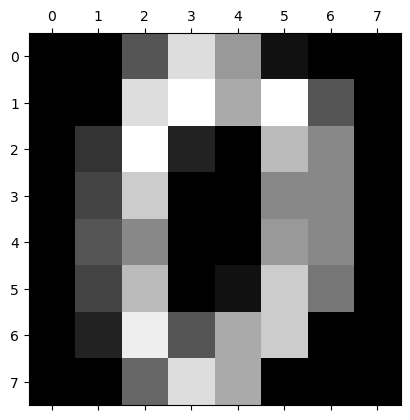

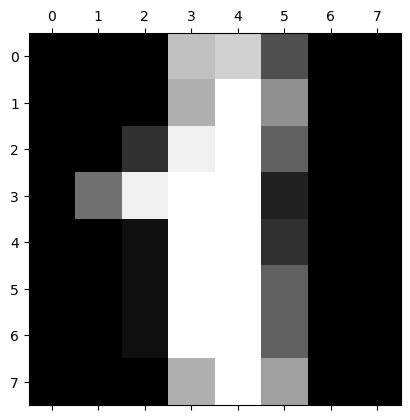

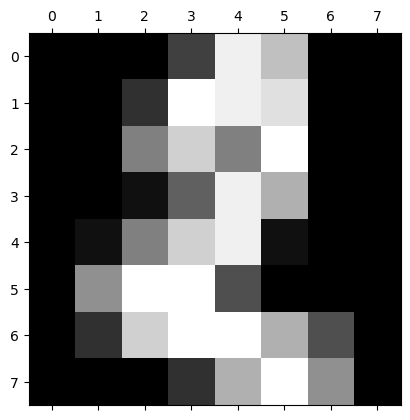

Accuracy: 0.9527027027027027
[7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8
 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7 8 9 0 9
 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4
 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8
 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]
[[26  0  0  0  1  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  2  0  0  4  0]
 [ 0  0  0  0 30  0  0  0  0  3]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  2  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  1  0  0  1 29]]


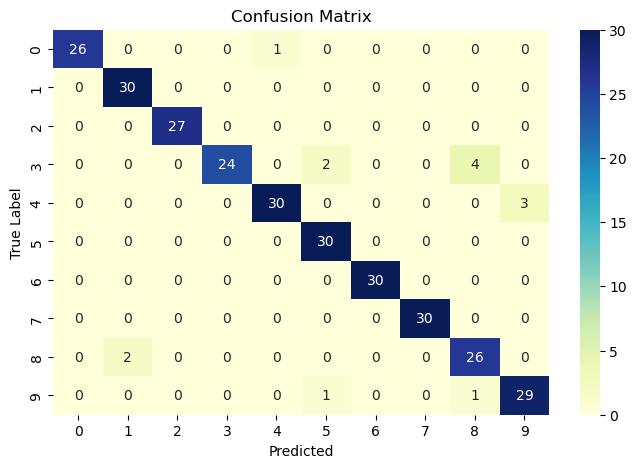

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.94      1.00      0.97        30
           2       1.00      1.00      1.00        27
           3       1.00      0.80      0.89        30
           4       0.97      0.91      0.94        33
           5       0.91      1.00      0.95        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.84      0.93      0.88        28
           9       0.91      0.94      0.92        31

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.95      0.95       296



In [144]:
import numpy as np
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Load the digits dataset
digits = datasets.load_digits()
# Display some sample images from the dataset
plt.gray()
for i in range(3):
 plt.matshow(digits.images[i])
plt.show()

# Set up data and labels
X = digits.data
y = digits.target

# Split the data for training and testing
X_train, X_test, y_train, y_test = X[:1500], X[1501:], y[:1500], y[1501:]
# Create the SVM classifier with a specified gamma and C value
svc = svm.SVC(gamma=0.001, C=100)
# Train the classifier on the training data
svc.fit(X_train, y_train)
# Make predictions on the test set
predictions = svc.predict(X_test)
# Calculate and print the accuracy
print("Accuracy:", accuracy_score(y_test, predictions))
# Generate and display the confusion matrix
print(y_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Print the classification report for additional performance metrics
print(classification_report(y_test, predictions))

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting (GBM)': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=50, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Display the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    
    # Plot confusion matrix for each model
    plt.figure(figsize=(6, 4))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True Label')
    plt.show()

# Compare performance across models
# Create a DataFrame to compare metrics
performance_df = pd.DataFrame({
    'Accuracy': [metrics['Accuracy'] for metrics in results.values()],
    'Precision': [metrics['Precision'] for metrics in results.values()],
    'Recall': [metrics['Recall'] for metrics in results.values()],
    'F1 Score': [metrics['F1 Score'] for metrics in results.values()]
}, index=results.keys())

# Plot the performance comparison
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of AdaBoost, GBM, and XGBoost on Iris Dataset')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()
